# Data augmentation

Este notebook demonstra como realizado o *data augmentation* (aumento de dados): uma técnica para aumentar a diversidade do conjunto de treinamento aplicando transformações às imagens.

Para isso, a biblioteca Tensorflow disponibiliza duas formas diferentes:

1. Funções do módulo `tf.image` tais como: `tf.image.flip_left_right`, `tf.image.rgb_to_grayscale`, `tf.image.adjust_brightness`, `tf.image.central_crop`, and `tf.image.stateless_random*`.
<br/><br/>

2. Camadas de pré-processamento do módulos Keras, como `tf.keras.layers.Resizing`, `tf.keras.layers.Rescaling`, `tf.keras.layers.RandomFlip`, `tf.keras.layers.RandomRotation`, etc.

## Importando as bibliotecas.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers

## Baixando a base de dados.

Este tutorial usa o conjunto de dados [Horses or humans](https://www.tensorflow.org/datasets/catalog/horses_or_humans). Por conveniência, vamos baixá-lo usando o módulo [TensorFlow Datasets](https://www.tensorflow.org/datasets).



In [28]:
(train_ds, test_ds), metadata = tfds.load(
    'horses_or_humans',                                     # nome do dataset a ser baixado.
    split=['train', 'test'],                                # divisão do dataset.
    with_info=True,                                         # retorna o metadata do dataset.
    as_supervised=True,                                     # retorna os rótulos.
)

O dataset possui 2 classes.

In [29]:
num_classes = metadata.features['label'].num_classes
print(num_classes)

2


Vamos plotar uma imagem do conjunto de dados e usá-la para demonstrar o uso das funções de *data augmentation*.

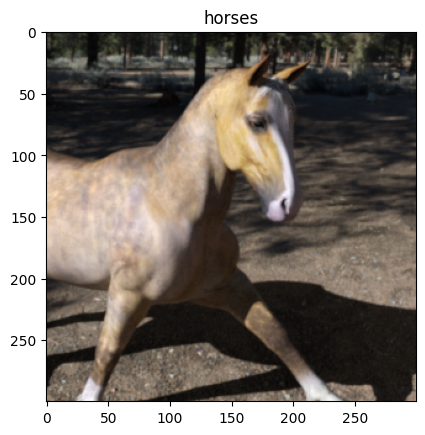

In [30]:
get_label_name = metadata.features['label'].int2str

image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

In [31]:
image.shape

TensorShape([300, 300, 3])

## Usando as funções do módulo tf.image

Definimos a função abaixo para visualizar e comparar as imagens original e aumentada lado a lado.

In [32]:
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)
  plt.axis('off')

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)
  plt.axis('off')

### Data augmentation

### Virando uma imagem

Para virar uma imagem horizontalmente (da esquerda para a direita) usamos a função `tf.image.flip_left_right`.

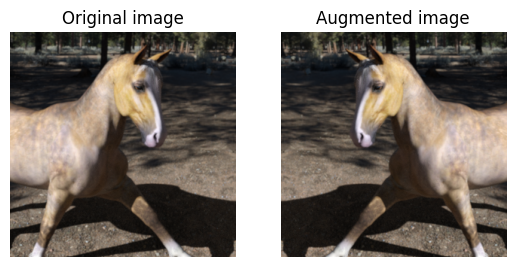

In [33]:
flipped = tf.image.flip_left_right(image)
visualize(image, flipped)

#### Conversão em escala de cinza de uma imagem

Podemos converter uma imagem em escala de cinza com a função `tf.image.rgb_to_grayscale`.

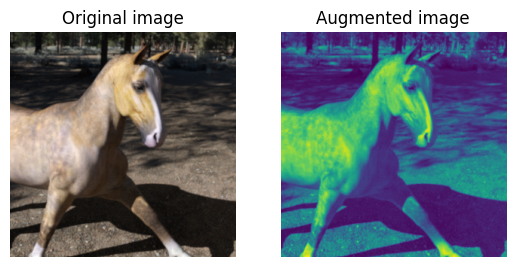

In [34]:
grayscaled = tf.image.rgb_to_grayscale(image)

visualize(image, tf.squeeze(grayscaled))

#### Saturando uma imagem

Podemos saturar uma imagem com a função `tf.image.adjust_saturation` fornecendo um fator de saturação.

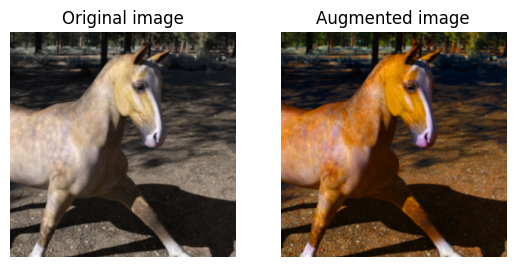

In [35]:
saturated = tf.image.adjust_saturation(image, 3)
visualize(image, saturated)

#### Alterando o brilho de uma imagem

Podemos alterar o brilho da imagem com a função `tf.image.adjust_brightness` passando um fator de brilho.

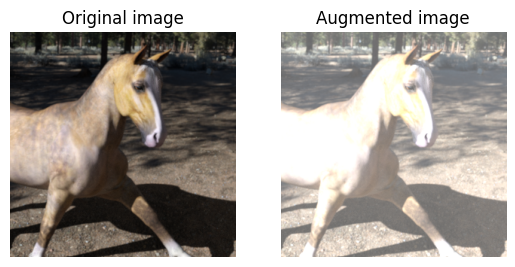

In [36]:
bright = tf.image.adjust_brightness(image, 0.4)
visualize(image, bright)

#### Cortando a parte central de uma imagem

Corte uma fração da parte central de uma imagem com a função `tf.image.central_crop`.

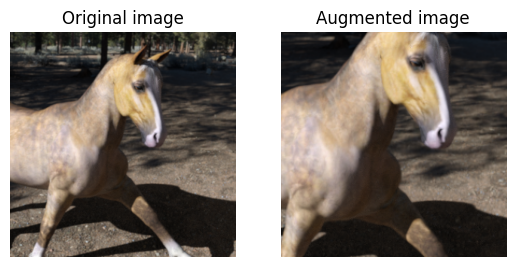

In [37]:
cropped = tf.image.central_crop(image, central_fraction=0.7)
visualize(image,cropped)

#### Rotacionando uma imagem

Podemos rotacionar uma imagem em 90 graus com a função `tf.image.rot90`.

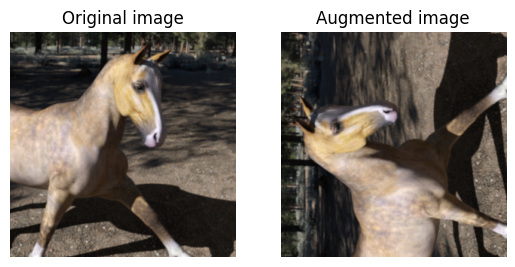

In [38]:
rotated = tf.image.rot90(image)
visualize(image, rotated)

### Aplicando transformações aleatórias.

A aplicação de transformações aleatórias às imagens pode ajudar ainda mais a generalizar e expandir o conjunto de dados. A API `tf.image` fornece oito operações aleatórias de imagem:

*   [`tf.image.stateless_random_brightness`](https://www.tensorflow.org/api_docs/python/tf/image/stateless_random_brightness)
*   [`tf.image.stateless_random_contrast`](https://www.tensorflow.org/api_docs/python/tf/image/stateless_random_contrast)
*   [`tf.image.stateless_random_crop`](https://www.tensorflow.org/api_docs/python/tf/image/stateless_random_crop)
*   [`tf.image.stateless_random_flip_left_right`](https://www.tensorflow.org/api_docs/python/tf/image/stateless_random_flip_left_right)
*   [`tf.image.stateless_random_flip_up_down`](https://www.tensorflow.org/api_docs/python/tf/image/stateless_random_flip_up_down)
*   [`tf.image.stateless_random_hue`](https://www.tensorflow.org/api_docs/python/tf/image/stateless_random_hue)
*   [`tf.image.stateless_random_jpeg_quality`](https://www.tensorflow.org/api_docs/python/tf/image/stateless_random_jpeg_quality)
*   [`tf.image.stateless_random_saturation`](https://www.tensorflow.org/api_docs/python/tf/image/stateless_random_saturation)

Essas funções requerem que uma `seed` seja inserida em cada etapa. Dada a mesma `seed`, elas retornam os mesmos resultados independente de quantas vezes são chamadas.

**OBS**.: `seed` é um `Tensor` de forma `(2,)` cujos valores são quaisquer números inteiros.

Nas seções a seguir, iremos ver:
1. Exemplos de uso de operações aleatórias para transformar uma imagem; e
2. Como aplicar transformações aleatórias a um conjunto de dados de treinamento.

#### Alterando aleatoriamente o brilho da imagem

Podemos alterar aleatoriamente o brilho de `image` usando `tf.image.stateless_random_brightness` fornecendo um fator de brilho e `seed`.

O fator de brilho é escolhido aleatoriamente no intervalo `[-max_delta, max_delta)` e está associado à `seed` fornecida.

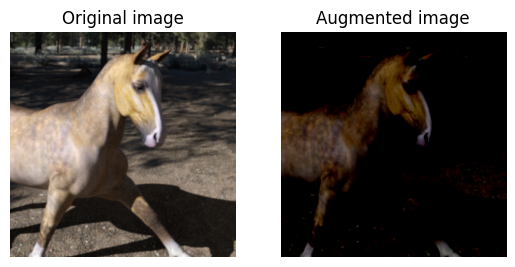

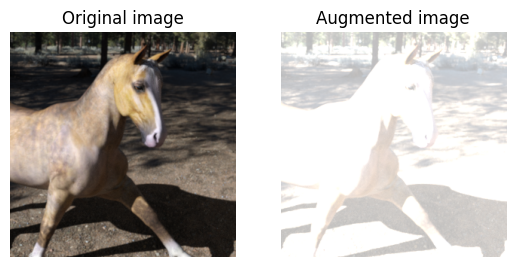

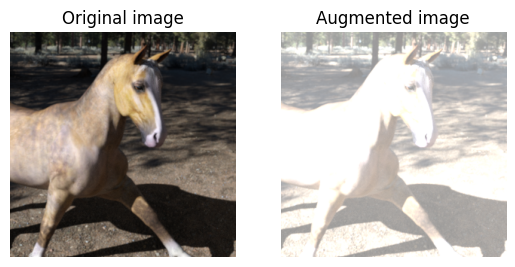

In [39]:
for i in range(3):
  seed = (i, 0)  # tuple of size (2,)
  stateless_random_brightness = tf.image.stateless_random_brightness(image, max_delta=0.95, seed=seed)
  visualize(image, stateless_random_brightness)

#### Alterando aleatoriamente o contraste da imagem

Podemos alterar aleatoriamente o contraste de `image` usando `tf.image.stateless_random_contrast` fornecendo um intervalo de contraste e `seed`.

A faixa de contraste é escolhida aleatoriamente no intervalo `[inferior, superior]` e está associada à `seed` fornecida.

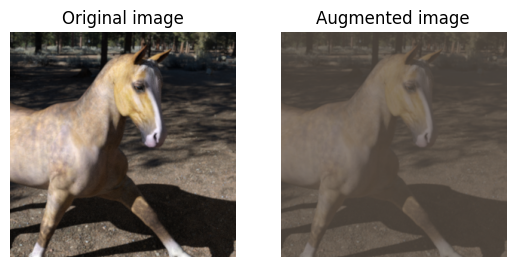

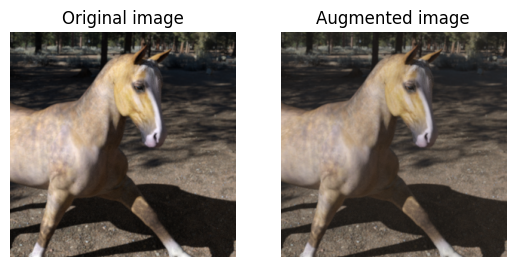

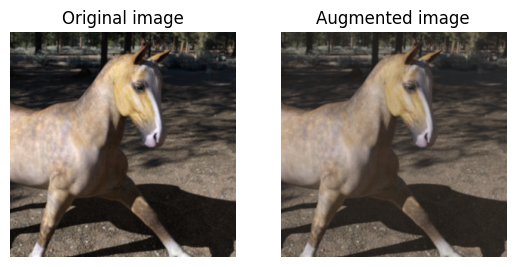

In [40]:
for i in range(3):
  seed = (i, 0)  # tuple of size (2,)
  stateless_random_contrast = tf.image.stateless_random_contrast(image, lower=0.1, upper=0.9, seed=seed)
  visualize(image, stateless_random_contrast)

#### Cortando aleatoriamente uma imagem

Podemos cortar aleatoriamente `image` usando `tf.image.stateless_random_crop`, fornecendo `size` e `seed` de destino.

A parte que é cortada da `image` está em um deslocamento escolhido aleatoriamente e está associada à `seed` fornecida.

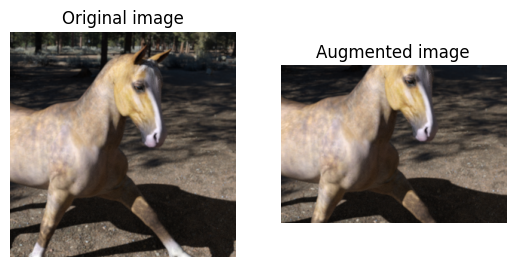

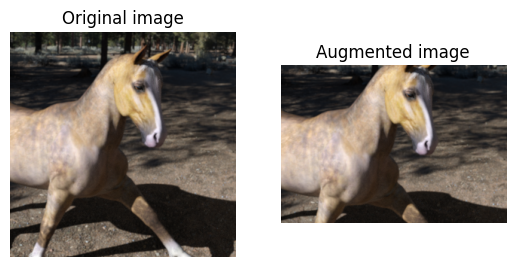

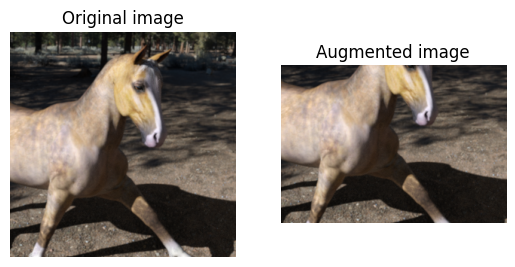

In [41]:
for i in range(3):
  seed = (i, 0)  # tuple of size (2,)
  stateless_random_crop = tf.image.stateless_random_crop(image, size=[210, 300, 3], seed=seed)
  visualize(image, stateless_random_crop)

### Aplicando o aumento de dados a um conjunto de dados


A seguir, definimos uma função para redimensionar e escalonar as imagens.

Esta função será usada para unificar o tamanho e a escala das imagens no conjunto de dados.

In [42]:
def resize_and_rescale(image, label):
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
  image = (image / 255.0)
  return image, label

Vamos também definir a função `augment` que aplica algumas transformações aleatórias às imagens. Esta função será usada no conjunto de dados na próxima etapa.

In [43]:
def augment(image_label, seed):
  image, label = image_label
  image, label = resize_and_rescale(image, label)
  # Crops and/or pads an image to a target width and height.
  image = tf.image.resize_with_crop_or_pad(image, IMG_SIZE + 6, IMG_SIZE + 6)
  # Make a new seed.
  new_seed = tf.random.experimental.stateless_split(seed, num=1)[0, :]
  # Random crop back to the original size.
  image = tf.image.stateless_random_crop(image, size=[IMG_SIZE, IMG_SIZE, 3], seed=seed)
  # Random brightness.
  image = tf.image.stateless_random_brightness(image, max_delta=0.5, seed=new_seed)
  # Clips tensor values to a specified min and max.
  image = tf.clip_by_value(image, 0, 1)
  return image, label

#### Opção 1: usando a classe `tf.data.experimental.Counter`

Criamos um objeto `tf.data.experimental.Counter` (vamos chamá-lo de `counter`) e `Dataset.zip` o conjunto de dados com `(counter, counter)`.

Isso garantirá que cada imagem no conjunto de dados seja associada a um valor exclusivo (de forma `(2,)`) baseado em `counter` que mais tarde pode ser passado para a função `augment` como o valor `seed` para transformações aleatórias .

Vamos primeiro baixar o conjunto de dados de imagens novamente, caso eles tenham sido modificados nas seções anteriores.

In [44]:
# Reload the dataset again.
(train_ds, test_ds), metadata = tfds.load(
    'horses_or_humans',                                     # nome do dataset a ser baixado.
    split=['train', 'test'],                                # divisão do dataset.
    with_info=True,                                         # retorna o metadata do datase.
    as_supervised=True,                                     # retorna os rótulos.t
)

In [45]:
# Create a `Counter` object and `Dataset.zip` it together with the trainining set.
counter = tf.data.Dataset.counter()
train_ds = tf.data.Dataset.zip((train_ds, (counter, counter)))

Instructions for updating:
Use `tf.data.Dataset.counter(...)` instead.


Mapeando a função `augment` para o conjunto de dados de treinamento:

In [46]:
IMG_SIZE = 160

batch_size = 32

train_ds = (
    train_ds
    .shuffle(2000)
    .map(augment, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    .batch(batch_size)
    .prefetch(tf.data.experimental.AUTOTUNE)
)

In [47]:
test_ds = (
    test_ds
    .map(resize_and_rescale, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    .batch(batch_size)
    .prefetch(tf.data.experimental.AUTOTUNE)
)

#### Opção 2: usando tf.random.Generator

- Crie um objeto `tf.random.Generator` com um valor inicial para a `seed`. Chamar a função `make_seeds` no mesmo objeto gerador sempre retorna um novo e único valor `seed`.
- Defina uma função wrapper que: 1) chame a função `make_seeds`; e 2) passa o valor `seed` recém-gerado para a função `augment` para transformações aleatórias.

Vamos primeiro baixar o conjunto de dados de imagens novamente, caso eles tenham sido modificados nas seções anteriores.

In [48]:
# Reload the dataset again.
(train_ds, test_ds), metadata = tfds.load(
    'horses_or_humans',                                     # nome do dataset a ser baixado.
    split=['train', 'test'],                                # divisão do dataset.
    with_info=True,                                         # retorna o metadata do datase.
    as_supervised=True,                                     # retorna os rótulos.t
)

In [49]:
# Create a generator.
rng = tf.random.Generator.from_seed(123, alg='philox')

In [50]:
# Create a wrapper function for updating seeds.
def f(x, y):
  seed = rng.make_seeds(2)[0]
  image, label = augment((x, y), seed)
  return image, label

Mapeie a função wrapper `f` para o conjunto de dados de treinamento e a função `resize_and_rescale` — para os conjuntos de validação e teste:

In [51]:
train_ds = (
    train_ds
    .shuffle(2000)
    .map(f, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    .batch(batch_size)
    .prefetch(tf.data.experimental.AUTOTUNE)
)

In [52]:
test_ds = (
    test_ds
    .map(resize_and_rescale, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    .batch(batch_size)
    .prefetch(tf.data.experimental.AUTOTUNE)
)

Esses conjuntos de dados agora podem ser usados para treinar um modelo.

## Usando as camadas do módulo keras.

### Baixando a base de dados mais uma vez.

In [53]:
(train_ds, test_ds), metadata = tfds.load(
    'horses_or_humans',                                     # nome do dataset a ser baixado.
    split=['train', 'test'],                                # divisão do dataset.
    with_info=True,                                         # retorna o metadata do dataset.
    as_supervised=True,                                     # retorna os rótulos.
)

Vamos plotar uma imagem do conjunto de dados e usá-la para demonstrar o aumento de dados.

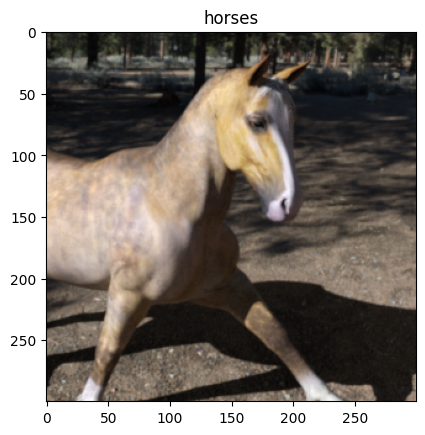

In [54]:
get_label_name = metadata.features['label'].int2str

image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

### Redimensionando e escalonando os dados.

In [55]:
IMG_SIZE = 160

batch_size = 32

Podemos usar as camadas de pré-processamento do módulo Keras para redimensionar as imagens (com `tf.keras.layers.Resizing`) e para escalonar os valores dos pixels (com `tf.keras.layers.Rescaling`).

In [56]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

**Observação**: A camada de redimensionamento acima normaliza os valores de pixel para o intervalo [0, 1]. Se, em vez disso, quiseséssemos que fosse [-1, 1], deveríamos escrever `tf.keras.layers.Rescaling(1./127.5, offset=-1)`.

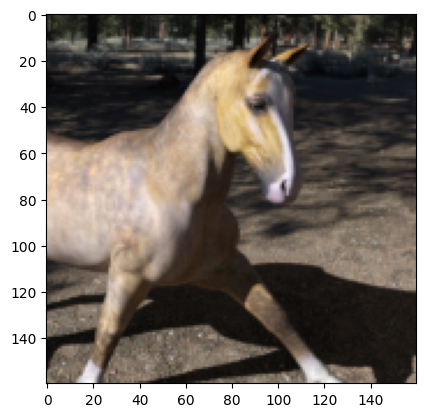

In [57]:
result = resize_and_rescale(image)
_ = plt.imshow(result)

In [58]:
result.shape

TensorShape([160, 160, 3])

### Camadas para aumentar os dados.

Podemos pode usar as camadas de pré-processamento do módulo Keras para aumento de dados, como `tf.keras.layers.RandomFlip` e `tf.keras.layers.RandomRotation`.

In [59]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [60]:
# Add the image to a batch.
img = tf.expand_dims(result, 0)

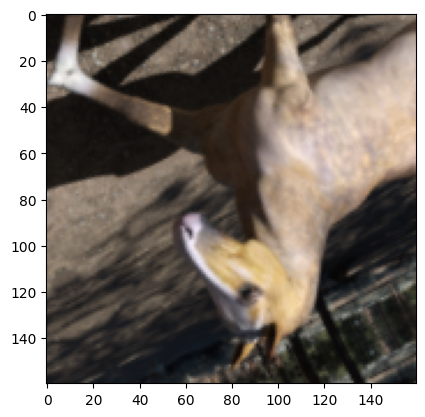

In [61]:
augmented_image = data_augmentation(img)
plt.imshow(augmented_image[0])

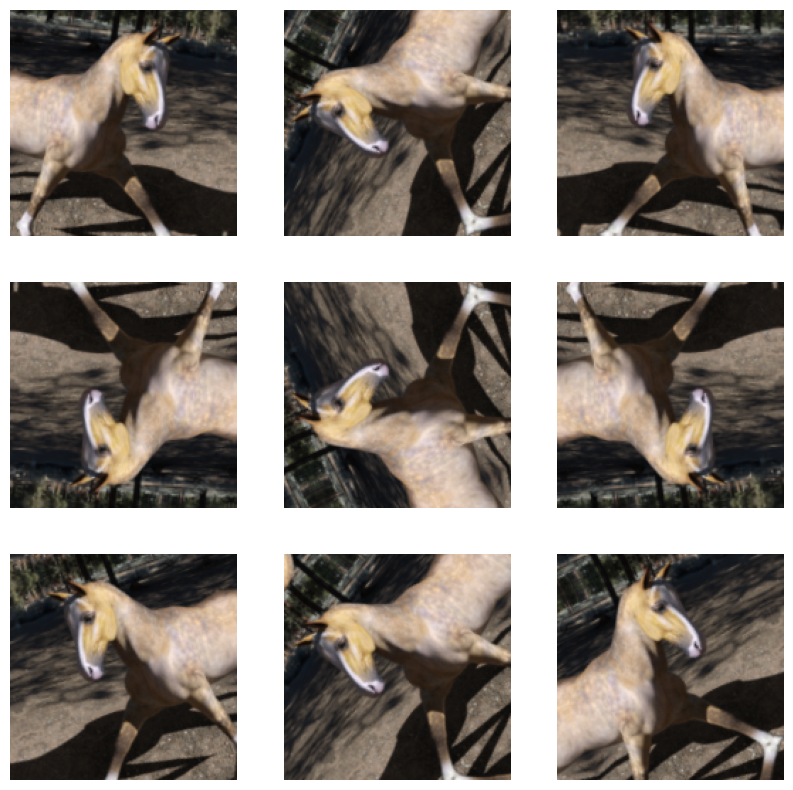

In [62]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(img)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

Há uma variedade de camadas de pré-processamento que podemos usar para aumentar os dados, incluindo `tf.keras.layers.RandomContrast`, `tf.keras.layers.RandomCrop`, `tf.keras.layers.RandomZoom` e outras.

#### Fazendo as camadas de pré-processamento parte de um modelo.

In [63]:
model = tf.keras.Sequential([
  # Add the preprocessing layers you created earlier.
  resize_and_rescale,
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # Rest of your model.
])

Há dois pontos importantes a serem observados neste caso:

* O aumento de dados será executado no dispositivo, de forma síncrona com o restante de suas camadas, e se beneficiará da aceleração da GPU.

* Quando você exporta seu modelo usando `model.save`, as camadas de pré-processamento serão salvas junto com o resto do seu modelo. Se você implantar este modelo posteriormente, ele padronizará automaticamente as imagens (de acordo com a configuração de suas camadas). Isso pode evitar o esforço de reimplementar essa lógica no lado do servidor.